In [1]:
import scipy.integrate as spi
import numpy as np
import matplotlib.pyplot as plt

The SIR model decribes the spread of an infectious disease among a population.

Let $S$ be the number of susceptible people, $I$ be the number of infective people, and $R$ be the number of recovered people.Then the SIR equations read:

$$\color{blue}{\begin{aligned}
\frac{\mathrm{d} S}{\mathrm{d} t} & = -\beta SI\\
\frac{\mathrm{d} I}{\mathrm{d} t} & = \beta SI - \gamma I\\
\frac{\mathrm{d} R}{\mathrm{d} t} & = \gamma I\\
\end{aligned}}$$


If we further introduce dimensionless quantities

$$ \hat{S} = \frac{S}{N} \qquad \hat{I} = \frac{I}{N} \qquad \hat{R} = \frac{r}{N} \qquad \tau = \gamma t$$

The SIR equations can be rewritten as the following

$$\color{blue}{\begin{aligned}
\frac{\mathrm{d} \hat{S}}{\mathrm{d} \tau} & = - \mathcal{R}_0 \hat{S}\hat{I}\\
\frac{\mathrm{d} \hat{I}}{\mathrm{d} \tau} & = \mathcal{R}_0 \hat{S}\hat{I} - \hat{I} \\
\frac{\mathrm{d} \hat{R}}{\mathrm{d} \tau} & = \hat{I} \\
\end{aligned}}$$

subject to the constraint that $\hat{S} + \hat{I}+ \hat{R} = 1$. 

Here it is clear to see that the behaviour of the model is solely dependent on one single parameter, the basic reproducive rate $\mathcal{R}_0 \equiv \frac{\beta N}{\gamma}$.

$\mathcal{R}_0$ is an estimate of the number of individuals that are affected by a primary infective individual. If $\mathcal{R}_0 > 1$, then the infectious disease will develop into an epidemic.



In [2]:
# initial proportions for susceptible, infective adn recovered
I_0 = 0.005
R_0 = 0
S_0 = 1 - I_0 - R_0
INIT_VALUES = (S_0, I_0, R_0)

# simulation time
T = 30
T_step = 0.01
T_range = np.arange(0, T, T_step)

In [3]:
def SIR_model(init_values, t, r):
    # SIR model in terms of three differential equations
    SIR = np.zeros(3)
    X = init_values
    dSdt = - r * X[0] * X[1]
    dIdt = r * X[0] * X[1] - X[1]
    dRdt = X[1]
    return [dSdt, dIdt, dRdt]

In [4]:
def plot_SIR(r):
    # plot the variation in time of the proportions of S/I/R groups 
    # r = basic reproductive rate
    SIR_values = spi.odeint(SIR_model, INIT_VALUES, T_range, args=(r,))
    
    axes = plt.gca()
    axes.title.set_size(25)
    axes.xaxis.label.set_size(12)
    axes.yaxis.label.set_size(12)
    plt.plot(T_range, SIR_values[:,0], color = 'blue', label = 'Susceptible')
    plt.plot(T_range, SIR_values[:,1], color = 'red', label = 'Infective')
    plt.plot(T_range, SIR_values[:,2], color = 'green', label = 'Recovered')
    plt.title('SIR Model with $\mathcal{R}_0 = $' + str(r))
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('Proportion')
    plt.show()

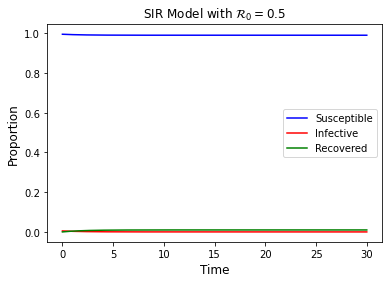

In [5]:
plot_SIR(0.5)

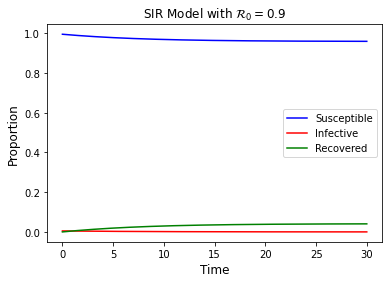

In [6]:
plot_SIR(0.9)

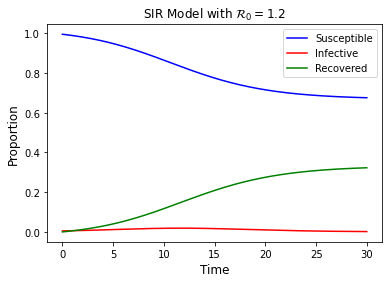

In [7]:
plot_SIR(1.2)

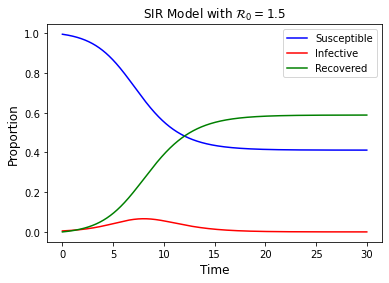

In [8]:
plot_SIR(1.5)

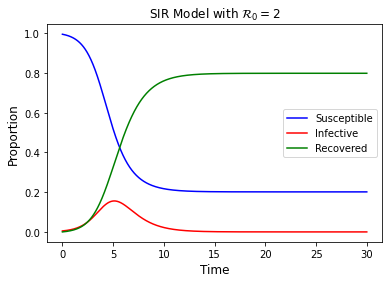

In [9]:
plot_SIR(2)

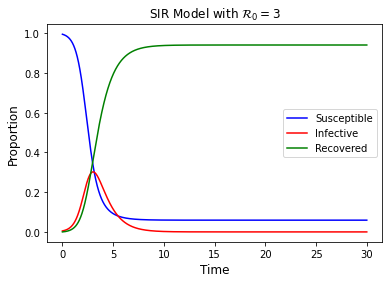

In [10]:
plot_SIR(3)

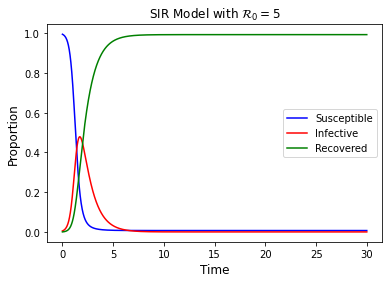

In [11]:
plot_SIR(5)

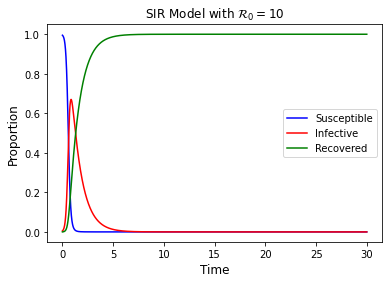

In [12]:
plot_SIR(10)

It can be shown that $R_\infty$, the fraction of the population that get infected in the long run, satisfies the following equation:

$$ 1 - \hat{R}_\infty - \mathrm{e}^{-\mathcal{R}_0 R_\infty} = 0$$

For a given $\mathcal{R}_0$, we can numerically solve for the value of $\hat{R}_\infty$. The approach that we adopt here is the Newton-Raphson method.

In [13]:
import math

def R_iterator(x, r):
    f = 1 - x - math.exp(-r*x)
    f_prime = -1 + r * math.exp(-r*x)
    return x - f/f_prime

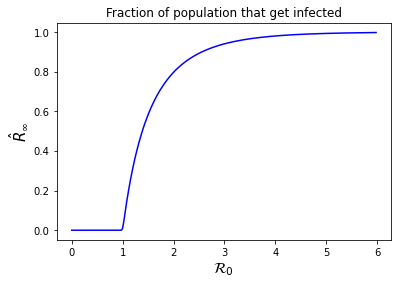

In [14]:
r_range = np.arange(0, 6, 0.02)
R_infty = []

for r in r_range:
    x = 1
    for dummy in range(6):
        x = R_iterator(x, r)
    R_infty.append(x)

axes = plt.gca()
plt.plot(r_range, R_infty, color = 'blue')
axes.title.set_size(20)
axes.xaxis.label.set_size(15)
axes.yaxis.label.set_size(15)
plt.title('Fraction of population that get infected')
plt.xlabel('$\mathcal{R}_0$')
plt.ylabel('$\hat{R}_\infty$')
plt.show()